### 实验介绍

#### 数据说明
该数据集是来自美国疾病控制预防中心的数据，背景是记录美国的糖尿病症状信息，现在美国1/7的成年人患有糖尿病。但是到2050年，这个比例将会快速增长至高达1/3。我们可以利用从UCI机器学习数据库里一个关于印第安人糖尿病数据集，通过数据挖掘相关算法来预测糖尿病，该问题本质上是一个二元分类问题。


准备工作：导入相关数据读取、处理、分析、可视化，算法模块等。
这段代码主要用于处理Python中的警告和配置Jupyter Notebook的绘图显示。

In [1]:
# 警告处理 
import warnings
warnings.filterwarnings('ignore')
# 在Jupyter上画图
%matplotlib inline

步骤 1载入本地数据集(pima-indians-diabetes.data)，以dataframe形式存放后，命名为df，加载并初步探索。

In [2]:
#引入相关支持的包
import pandas as pd
import numpy as np
#可以事先将提供的数据集存储在本地，此处对该地址进行引用即可
#注意文件所存放路径不要有中文，容易报错
df= pd.read_csv(r'pima-indians-diabetes.data',sep=',')
#并观察熟悉数据
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFuction,Age,Outcome
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1


利用head函数，可以看到：糖尿病数据集由768个数据点组成，各有9个特征，特征分别是：怀孕次数，血糖，血压，皮脂厚度，胰岛素，BMI身体质量指数，糖尿病遗传函数，年龄和结果，此处是一个数据框格式，前8个特征均是数值型属性，最后1列是目标向量，是我们将要预测的特征，其中0意味着未患糖尿病，1意味着患有糖尿病。

步骤 2查看数据尺寸、打印信息，判断特征的类型（名称性、数值型），目标变量分布以及查看是否均衡

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pregnancies              768 non-null    int64  
 1   Glucose                  768 non-null    int64  
 2   BloodPressure            768 non-null    int64  
 3   SkinThickness            768 non-null    int64  
 4   Insulin                  768 non-null    int64  
 5   BMI                      768 non-null    float64
 6   DiabetesPedigreeFuction  768 non-null    float64
 7   Age                      768 non-null    int64  
 8   Outcome                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

步骤 3对df特征进行相关性可视化，这段代码用于计算数据集中特征之间的相关性，并通过热力图可视化结果。
%matplotlib inline: 在Jupyter Notebook中内嵌显示图形。
seaborn: 基于Matplotlib的高级可视化库，简化统计图形的创建。
matplotlib.pyplot: Matplotlib的绘图接口，用于自定义图形。
df.corr(): 计算DataFrame中数值列的相关系数矩阵。
plt.figure(figsize=(25, 15)): 设置图形大小为25x15英寸，确保热力图清晰。
sns.heatmap(): 绘制相关性矩阵的热力图。
annot=True: 在每个单元格内显示相关系数值。
plt.show(): 显示图形。
皮尔逊相关系数（Pearson）: 适用于线性关系、连续且正态分布的数据。
斯皮尔曼相关系数（Spearman）: 适用于单调关系或非正态分布数据。

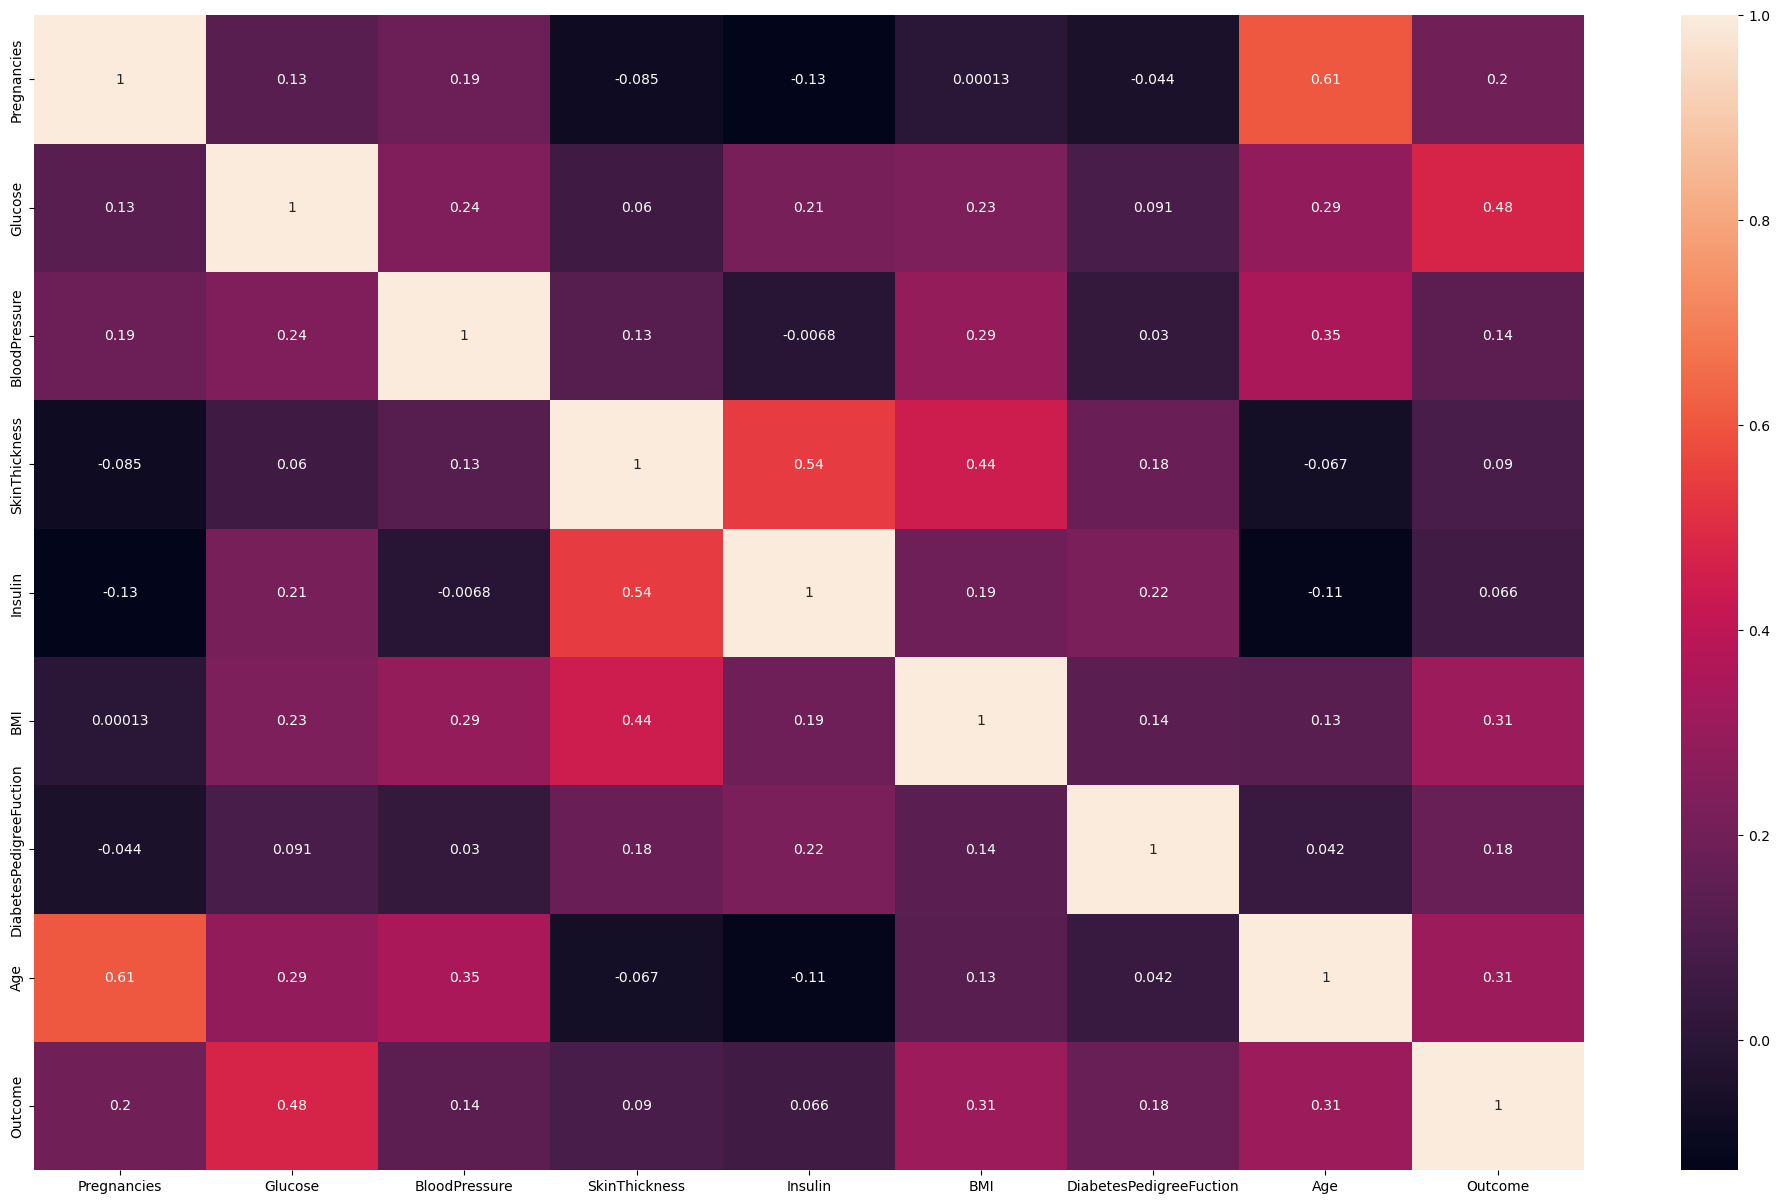

In [5]:
#导入相关包
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#计算特征相关性并可视化
corr_matrix = df.corr(method='spearman') # pearson 皮尔逊, 是spearman 斯皮尔曼 
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, annot= True)
plt.show()

步骤 4对df每个特征的分布进行可视化查看。
math: 提供数学运算函数（如ceil用于向上取整）。
dataset: 输入的DataFrame数据集。
cols: 每行显示的子图数量（默认5列）。
width, height: 整个图形的宽度和高度（英寸）。
hspace, wspace: 子图间的垂直和水平间距。
plt.style.available: 打印可用的Matplotlib样式。
plt.style.use(): 使用Seaborn的白色网格样式，提升可读性。
figsize: 设置图形大小。
subplots_adjust: 调整子图间距。
rows: 计算需要的行数（总列数除以每行子图数，向上取整）。
enumerate(dataset.columns): 遍历每列，获取索引和列名。
add_subplot: 创建子图。
ax.set_title: 设置子图标题为列名。
分类列处理（object类型）:
sns.countplot: 绘制分类变量的频数条形图。
截断长标签: 限制y轴标签长度为18字符，避免重叠。
数值列处理:
sns.distplot: 绘制数值变量的分布图（直方图+KDE曲线）。
plt.xticks(rotation=25): 旋转x轴标签25度，避免重叠。
调用函数并传入参数（3列、图形大小20x20英寸、间距调整）。
plt.show(): 显示图形。

Available styles: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


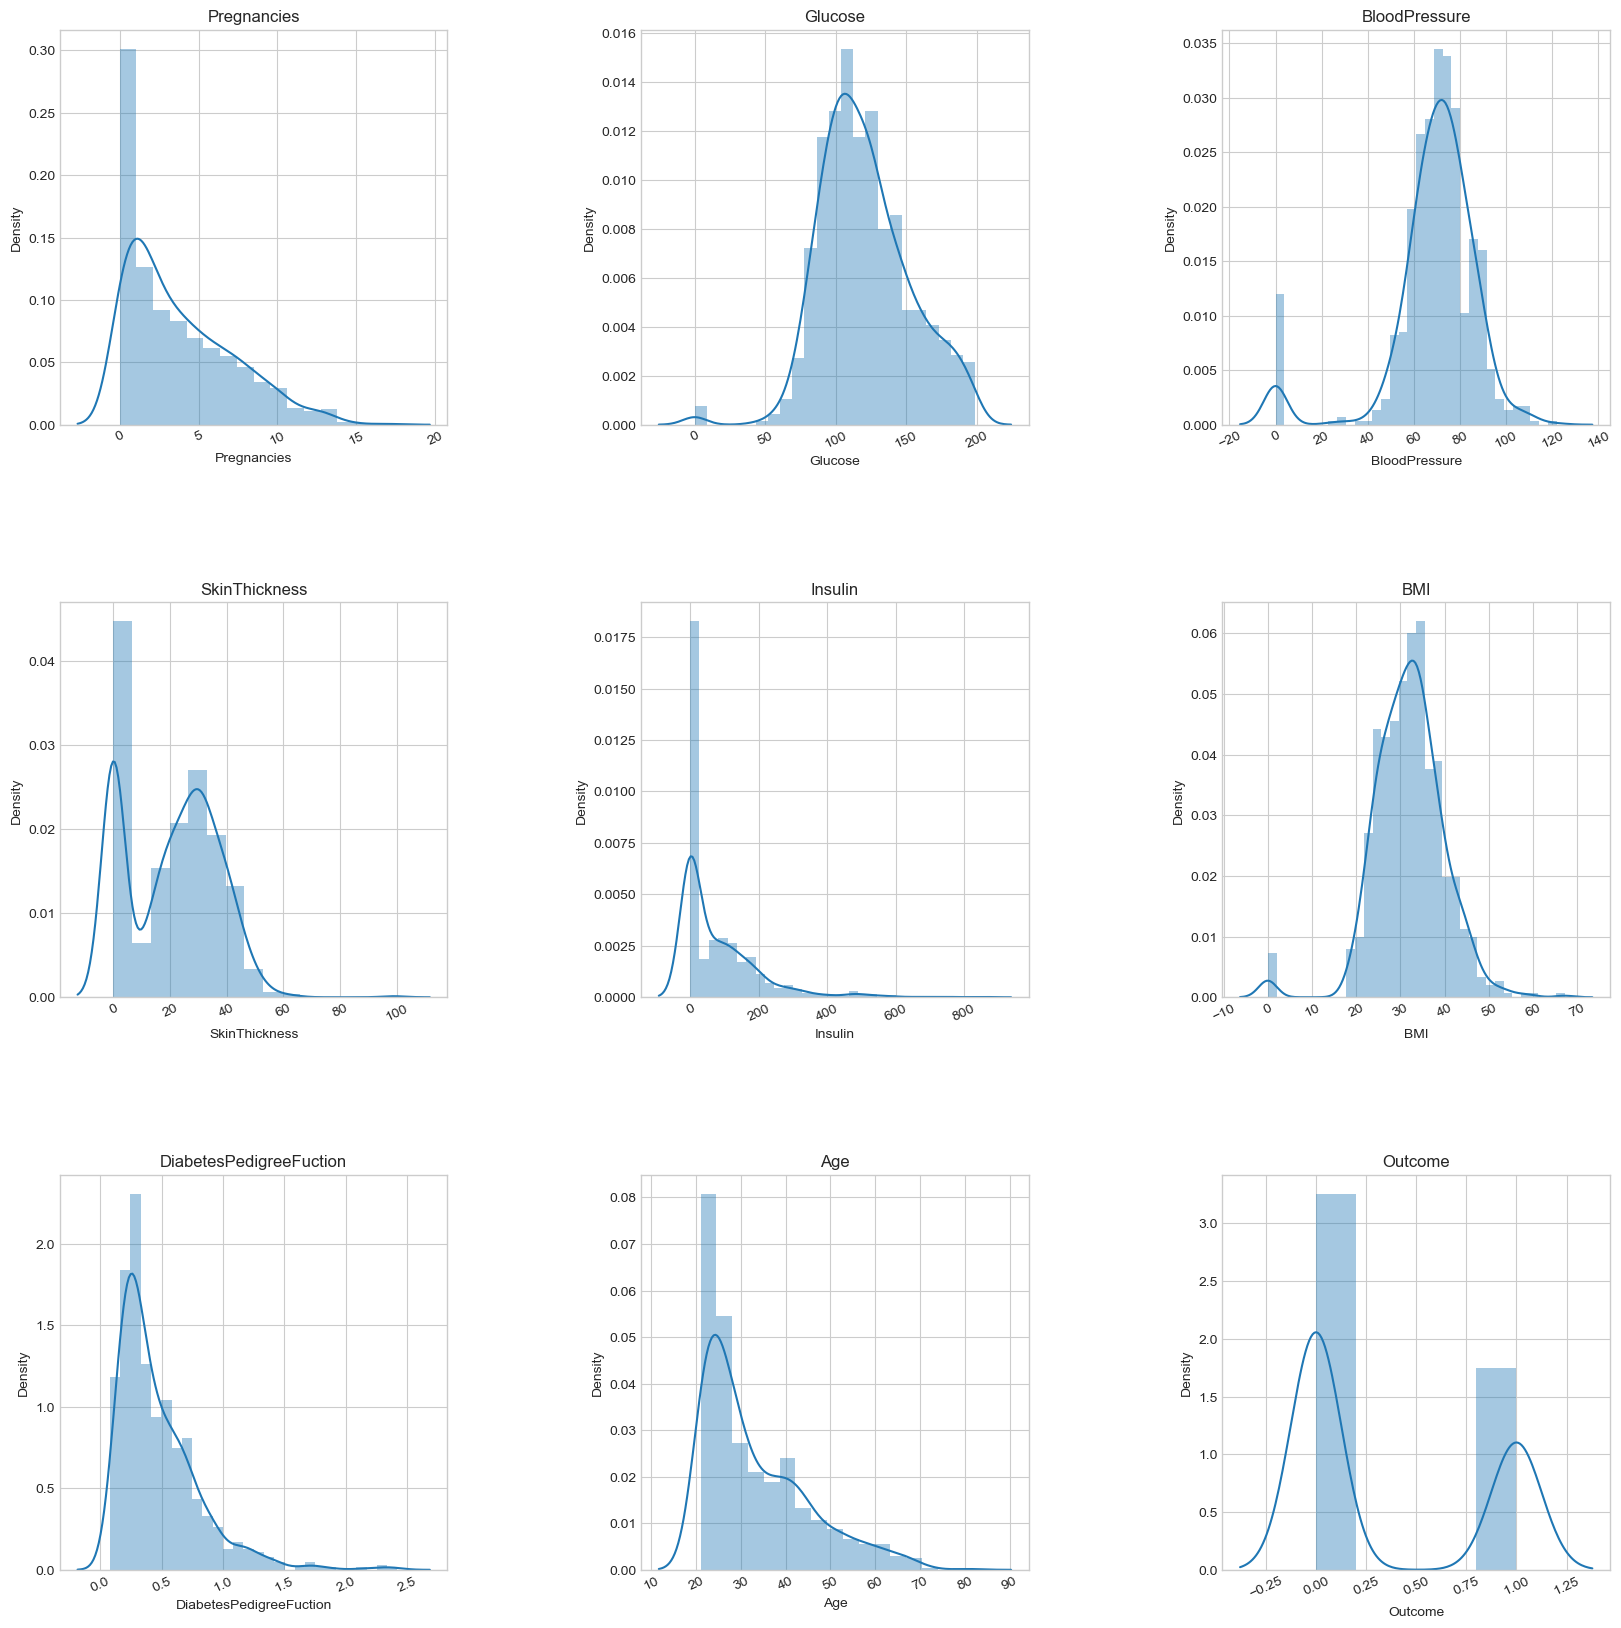

In [6]:
import math
# 绘制每个特征的分布
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    print("Available styles:", plt.style.available)
    plt.style.use('seaborn-v0_8-whitegrid') 
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace) # 调整图表位置和大小间距
    rows = math.ceil(float(dataset.shape[1]) / cols)# ceil方法向上取整
    for i, column in enumerate(dataset.columns): #返回索引和列名
        ax = fig.add_subplot(rows, cols, i + 1)# 创建子图，类似于subplot方法
        ax.set_title(column)	# 设置轴的标题
        if dataset.dtypes[column] == object: # 通过列的类型来区分所选取的图像类型
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25) 
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
plot_distribution(df, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)
plt.show()

这段代码准备数据集，将其分为特征（X）和目标变量（y），以便用于机器学习模型的训练和评估。

In [7]:
from sklearn.model_selection import train_test_split
from collections import Counter
x_cols = [col for col in df.columns if col!='Outcome']
y_col = 'Outcome'
X=df[x_cols].values    #dataframe 转化为 ndarray,才能进入下面的标准化和3D制图
y=df[y_col].values

##### Axes3D 绘图函数
是mpl_toolkits.mplot3d中的一个绘图函数，mpl_toolkits.mplot3d

p3d.Axes3D.scatter( xs, ys, zs=0, zdir=’z’, s=20, c=None, depthshade=True, *args, **kwargs )

p3d.Axes3D.scatter3D( xs, ys, zs=0, zdir=’z’, s=20, c=None, depthshade=True, *args, **kwargs)

这段代码使用Matplotlib绘制了一个3D散点图，展示了数据集中三个特定特征的分布情况，并根据目标变量y的类别对数据点进行着色和标记。
matplotlib.pyplot: 用于绘图。
mpl_toolkits.mplot3d: 提供3D绘图功能。
figsize=(8, 8): 设置图形大小为8x8英寸。
add_subplot(111, projection='3d'): 创建3D坐标轴。
zip('rg', 'sx', np.unique(y), ['class_1', 'class_2']):
'rg': 颜色（红色和绿色）。
'sx': 标记形状（方形和叉形）。
np.unique(y): 目标变量的唯一类别（假设为0和1）。
['class_1', 'class_2']: 图例标签。
ax.scatter: 绘制散点图。
X[y == i, 0]: 第1个特征（列索引0）。
X[y == i, 4]: 第5个特征（列索引4）。
X[y == i, 6]: 第7个特征（列索引6）。
c=c, marker=m: 分别设置颜色和标记形状。
label=l: 设置图例标签。
set_xlabel, set_ylabel, set_zlabel: 分别设置X、Y、Z轴的标签为DataFrame的列名。
set_title: 设置图形标题。
plt.legend(): 显示图例。
plt.show(): 显示图形。

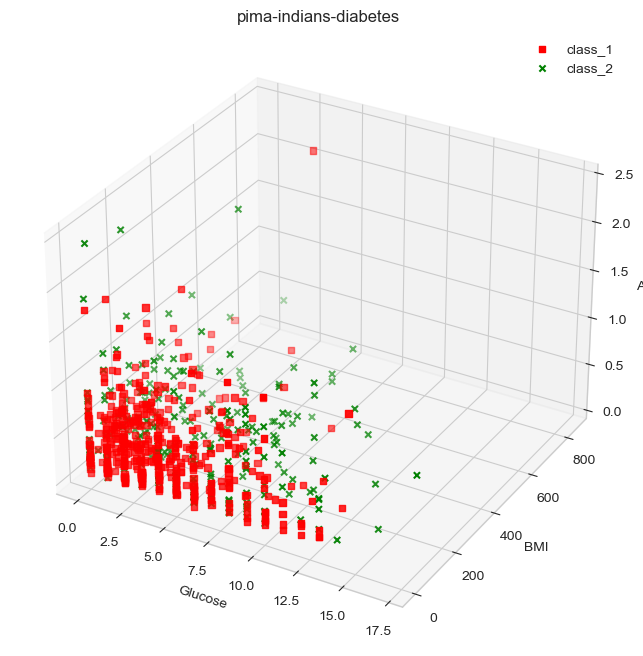

In [8]:
### 绘制3D散点图-3个维度的数据点的散点分布
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
for c,m,i,l in zip('rg','sx',np.unique(y),['class_1','class_2']):
    ax.scatter(X[y==i ,0], X[y==i, 4], X[y==i, 6],c=c,marker=m, label=l)
ax.set_xlabel(df.columns[1])
ax.set_ylabel(df.columns[5])
ax.set_zlabel(df.columns[7])
ax.set_title("pima-indians-diabetes")
plt.legend()
plt.show()

步骤 5对输入特征进行降维，选择PCA。

In [9]:
### 对输入特征进行降维处理
from sklearn.decomposition import PCA
from sklearn import preprocessing                    #调用标准化模块
X_std = preprocessing.scale(X)                        #降维训练前需要对数据标准化
pca = PCA(n_components=0.99, random_state=50 ) # 保留99%信息的主成分个主成分
X_pca =pca.fit(X_std).transform(X_std)

In [10]:
print('the Top 99% variance_ratio:',pca.explained_variance_ratio_)

the Top 99% variance_ratio: [0.26185321 0.21640525 0.12862254 0.10946977 0.09528539 0.08533321
 0.05247248 0.05055815]


In [11]:
X_pca.shape

(768, 8)

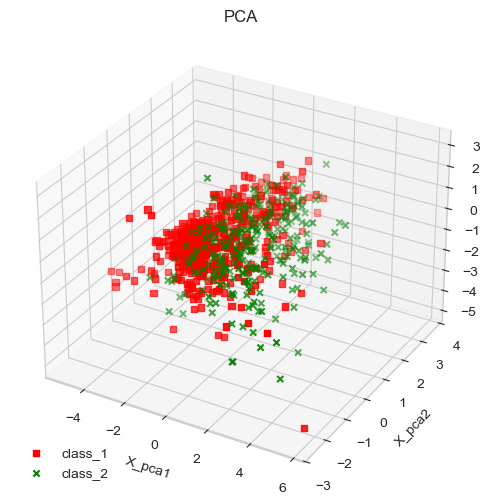

In [12]:
### 输出降维后的前3个主成分的分布图
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
for  c, m ,i,l in zip('rg','sx',np.unique(y),['class_1','class_2']):
    ax.scatter(X_pca[y==i, 0], X_pca[y==i,1],X_pca[y==i,2], c=c, label=l, marker=m) # 散点图
ax.set_xlabel('X_pca1')
ax.set_ylabel('X_pca2')
ax.set_zlabel('X_pca3')
ax.set_title("PCA")
plt.legend(loc='lower left')
plt.show()

#### 划分训练集与测试集

步骤 6结合相关性分析和降维后的结论，选择数据进行拆分为训练集和测试集，拆分比例设置为0.1，指定以Target的比例做分层抽样。

In [13]:
from collections import Counter
from sklearn.model_selection import train_test_split
### 选择不过滤和降维的全部数据进行训练
X_train, X_test, y_train, y_test = train_test_split(
                    df[x_cols],
                    df[y_col],
                    test_size=0.1,                #分割比例
                    random_state=42,              #随机数种子
                    shuffle=True,                 #是否打乱顺序 
                   stratify=df[y_col]                #指定以Target的比例做分层抽样
)               
print('Distribution of y_train {}'.format(Counter(y_train)))
print('Distribution of y_test {}'.format(Counter(y_test)))

Distribution of y_train Counter({0: 450, 1: 241})
Distribution of y_test Counter({0: 50, 1: 27})


步骤 7选择逻辑回归算法对拆分后的数据进行建模训练和预测，其中要求将原始模型做5折交叉验证，评估指标选择f1。

In [14]:
#引入逻辑斯谛回归和交叉验证的库
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#引入评价指标的库
from sklearn.metrics import f1_score

#### 交叉验证评估原始模型
    1：交叉验证用于评估模型的预测性能，尤其是训练好的模型在新数据上的表现，可以在一定程度上减小过拟合。
    2：还可以从有限的数据中获取尽可能多的有效信息。
sklearn.cross_validation.cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None,pre_dispatch=‘2*n_jobs’)
    estimator:估计方法对象(分类器)
    X：数据特征(Features)
    y：数据标签(Labels)
    soring：调用方法(包括accuracy和mean_squared_error等等)
    cv：几折交叉验证
    n_jobs：同时工作的cpu个数（-1代表全部）
返回值是：每次运行交叉验证的估计值数组。


In [15]:
# 声明逻辑斯谛回归模型
lr_model = LogisticRegression(solver='liblinear', max_iter=500)

# 假设 X_train 和 y_train 是训练数据和目标变量
# 对原始模型做交叉验证
cv_score = cross_val_score(lr_model, X_train, y_train, scoring='f1', cv=5)

# 输出交叉验证分数
print('Cross validation score of raw model: {}'.format(cv_score))

Cross validation score of raw model: [0.55       0.65060241 0.64516129 0.6744186  0.55      ]


In [16]:
#查看下当前模型
# 查看模型信息
print(lr_model.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


 ##### GridSearchCV()
   网格搜索（GridSearch）用于选取模型的最优超参数。获取最优超参数的方式可以绘制验证曲线，但是验证曲线只能每次获取一个最优超参数。如果多个超参数有很多排列组合的话，就可以使用网格搜索寻求最优超参数的组合。 
    estimator:选择使用的分类器，并且传入除需要确定最佳的参数之外的其他参数。
    param_grid:需要最优化的参数的取值，值为字典或者列表，键命名必须为模型本身的参数名称
    scoring：模型评价标准，默认None(即选择的estimator的误差估计函数)。常为'f1','accuracy','recall','roc_auc',‘average_precision’
    cv=None,交叉验证参数，默认3

步骤 8对逻辑回归的几个重要参数进行网格搜索，网格设置参考如下：

In [17]:
c_range=[0.001,0.01,0.1,1.0]
solvers = ['liblinear','lbfgs','newton-cg','sag']
max_iters=[80,100,150,200,300]
tuned_parameters= dict(solver=solvers, C=c_range,max_iter=max_iters)

In [18]:
#网格搜素
from sklearn.model_selection import GridSearchCV
grid= GridSearchCV(lr_model, tuned_parameters, cv=5, scoring='f1')
grid.fit(X_train,y_train)
print('best score for model {}'.format(grid.best_score_))
print('best parameters for model {}'.format(grid.best_params_))
print('best parameters for model {}'.format(grid.best_estimator_))


best score for model 0.6244254799841867
best parameters for model {'C': 1.0, 'max_iter': 80, 'solver': 'newton-cg'}
best parameters for model LogisticRegression(max_iter=80, solver='newton-cg')


步骤 9根据搜索参数，最后确认模型，进行预测。

In [19]:
#### 根据选择后的参数，最后预测
lr_model_final = LogisticRegression(C=1.0, max_iter=80, solver='newton-cg')
lr_model_final.fit(X_train,y_train)
y_train_pred = lr_model_final.predict(X_train)
print('final score of model version2: {}'.format(f1_score(y_train,y_train_pred)))

final score of model version2: 0.6448598130841121
